This will test a fitness sharing approach to fitness evaluation:
- likely to work better with cartpole and other multi reqard environments.

Genomes with similar layouts will be penalised / share their fitness

In [83]:
import random
import numpy as np


# function to create a random binary string of length n
def genome(n):
    return ''.join(random.choice('01') for i in range(n))


# define a genome population
population = []
for i in range(50):
    population.append(genome(50))



In [84]:
# assign a descending fitness score to each genome
fitness = []
for i in range(len(population)):
    fitness.append((len(population) - i) * 2)



[100,
 98,
 96,
 94,
 92,
 90,
 88,
 86,
 84,
 82,
 80,
 78,
 76,
 74,
 72,
 70,
 68,
 66,
 64,
 62,
 60,
 58,
 56,
 54,
 52,
 50,
 48,
 46,
 44,
 42,
 40,
 38,
 36,
 34,
 32,
 30,
 28,
 26,
 24,
 22,
 20,
 18,
 16,
 14,
 12,
 10,
 8,
 6,
 4,
 2]

In [85]:
# fitness sharing fitness update

# fitness sharing parameter
shar_param = 0.5

# minimum distance between genomes
min_dist = 20

# hamming distance function
def hamming_dist(s1, s2):
    dist = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            dist += 1
    return dist

new_fitness = []
for i, member in enumerate(population):
    denominator = 1
    for other in population:
        if member != other:
        # compute the distance between the two genomes
            dist = hamming_dist(member, other)
            if dist <= min_dist:
                denominator += (1 - dist/min_dist)**(shar_param)

    # update the fitness of the genome
    new_fitness.append( fitness[i] / denominator)



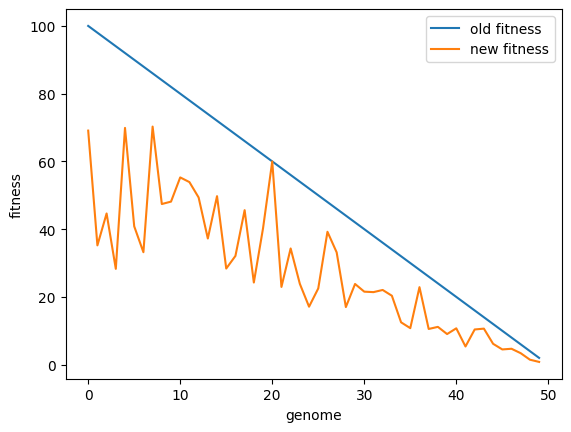

In [87]:
# show the difference in fitness as a plot 
import matplotlib.pyplot as plt
plt.plot(fitness, label='old fitness')
plt.plot(new_fitness, label='new fitness')
plt.xlabel('genome')
plt.ylabel('fitness')
plt.legend()
plt.show()


this confirms what should happen - higher scores with close-ish genomes will share their fitness.